# 1. The Standard Solar Model and a Polytrope Model

## (a)

with the data in SolarModel.txt

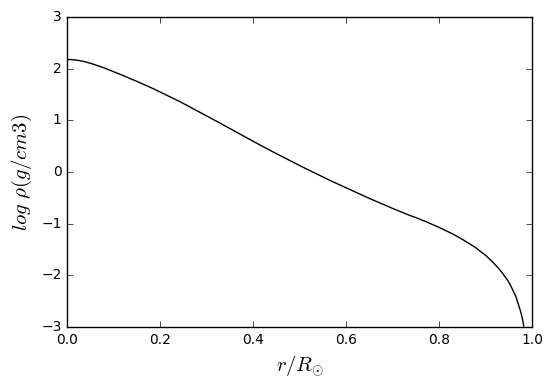

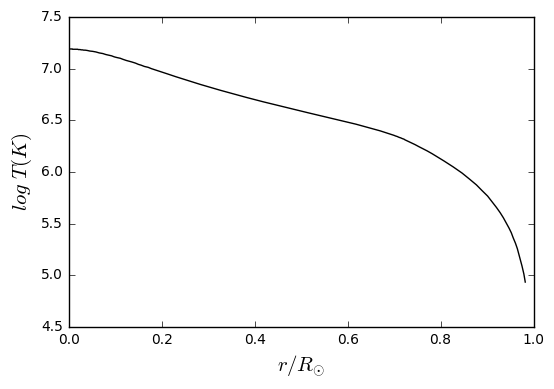

In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

data = ascii.read('SolarModel.txt')

rho = data['rho(g/cm3)']
T = data['T(K)']
r = data['r/Rsun']

plt.plot(r,np.log10(rho),'k')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$log\ \\rho(g/cm3)$',fontsize=15)
plt.show()
plt.plot(r,np.log10(T),'k')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$log\ T(K)$',fontsize=15)
plt.show()

## (b)

Given the metalicity is low(Z < 0.02), and considering a idealized condition,

ion pressure is mainly the pressure of $H^{+}$ and $He^{2+}$

$n_{H} = \frac{X\rho}{m_{u}}\qquad$
$n_{He} = \frac{Y\rho}{4m_{u}}\qquad$
$n_{e} = n_{H} + 2n_{He}$

$P_{ion} = (n_{H} + n_{He})kT$

$P_{e} = n_{e}kT$

and $P_{rad} = \frac{1}{3}aT^{4}$

where $m_u = 1.6605388\times10^{-24}g \qquad k = 1.380650\times10^{-16}ergK^{−1} \qquad a = 7.56578\times10^{-15}ergcm^{−3}K^{−4}$

then we can get

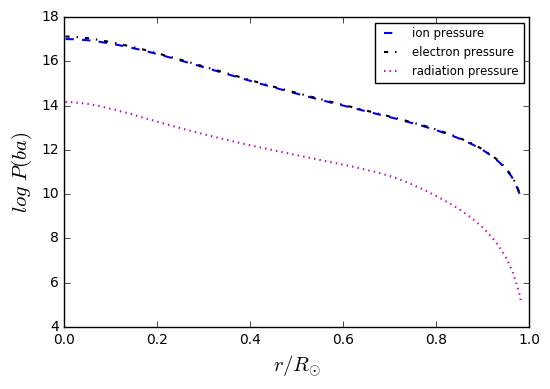

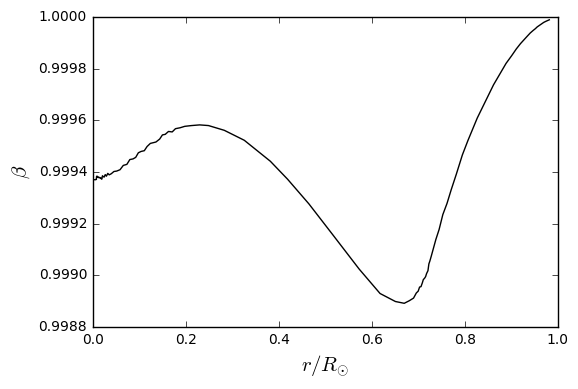

In [2]:
m_u = 1.6605388*10**-24     # g
k = 1.380650*10**-16        # erg K−1
a = 7.56578*10**-15         # erg cm−3 K−4.

X = data['X']
Y = data['Y']
n_H = X*rho/m_u
n_He = Y*rho/(4*m_u)
n_e = n_H+2*n_He

P_ion = (n_H+n_He)*k*T
P_e = n_e*k*T
P_rad = (a*T**4)/3
beta = (P_ion+P_e)/(P_ion+P_e+P_rad)

plt.plot(r,np.log10(P_ion),'b--',linewidth=1.5,label='ion pressure')
plt.plot(r,np.log10(P_e),'k-.',linewidth=1.5,label='electron pressure')
plt.plot(r,np.log10(P_rad),'m:',linewidth=1.5,label='radiation pressure')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$log\ P(ba)$',fontsize=15)
plt.legend(fontsize='small')
plt.show()
plt.plot(r,beta,'k')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$\\beta$',fontsize=15)
plt.show()

## (c)

In [6]:
print(beta[-20:])

      X       
--------------
0.999608696127
0.999679030668
0.999737312334
0.999783423443
0.999820436396
0.999850107114
0.999876225257
0.999896836774
0.999912872127
 0.99992645376
0.999938083451
0.999947487326
0.999954747262
0.999961608664
  0.9999677444
0.999972815108
0.999979067498
0.999983525892
0.999986549366
0.999989113429


replace the differentiation as difference and for the gravitation $\frac{dP_{gra}}{dr} = \frac{Gm(r)\rho(r)}{r^{2}}$

then with the data, we can get the plot as below

d:\python34\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


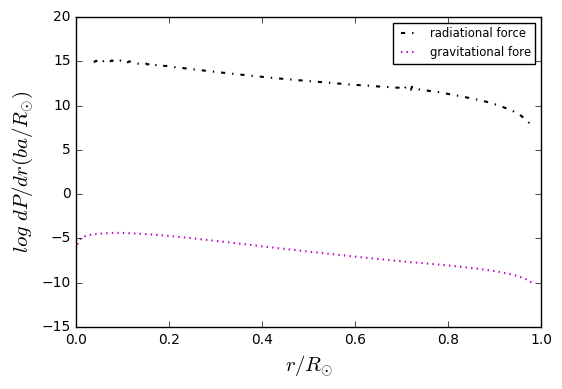

In [48]:
G = 6.6743*10**-8   #cm3 g−1 s−2

dP = P_rad[:-1] - P_rad[1:]
dr = r[1:] - r[:-1]
PF_rad = dP/dr

M_in = data['m(r)/Msun']
PF_G = 2*G*M_in[:-1]*(rho[1:]+rho[:-1])/(r[1:]+r[:-1])**2

plt.plot((r[1:]+r[:-1])/2,np.log10(PF_rad),'k-.',linewidth=1.5,label='radiational force')
plt.plot((r[1:]+r[:-1])/2,np.log10(PF_G),'m:',linewidth=1.5,label='gravitational fore')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$log\ dP/dr(ba/R_{\\odot})$',fontsize=15)
plt.legend(fontsize='small')
plt.show()

from the plot we can find that the force due to radiation $dP_{rad}/dr$ is much larger than that of gravitational force so that

to keep the stable of the stellar structure. 

## (d)

to find how the standard solar model close to a polytrope, I plot the logarithmic pressure with respect to logarithmic rho

as below shows and give a simple linear fiting. 

gamma ：  1.334     


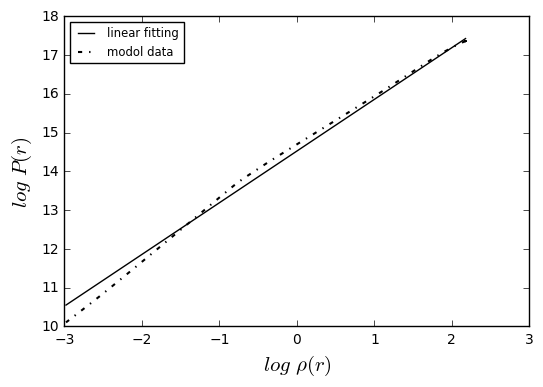

In [52]:
P_tol = P_ion + P_e + P_rad

coe = np.polyfit(np.log10(rho),np.log10(P_tol),1)
fit = np.poly1d(coe)

fit_y = fit(np.log10(rho))

#C_S = np.sum((fit_y - np.log10(P_tol))**2)/len(P_tol)
print('gamma ：  %-10.3f'%coe[0])

plt.plot(np.log10(rho),fit_y,'k-',label='linear fitting')
plt.plot(np.log10(rho),np.log10(P_tol),'k-.',label='modol data',linewidth=1.5)
plt.xlabel('$log\ \\rho(r)$',fontsize=15)
plt.ylabel('$log\ P(r)$',fontsize=15)
plt.legend(loc=2,fontsize='small')
plt.show()

emmmm, given the fittig $\gamma = 1.334$,  the standard solar model is nearly a polytrope with n = 3.

## (e)

As shown in (b), the equation of state inside the star is

$P = \frac{\rho}{\mu u_{H}}kT + \frac{1}{3}aT^{3} = \frac{\rho}{\mu\beta u_{H}}kT$

for $1-\beta = \frac{P_{rad}}{P} = \frac{aT^{4}}{3P}$ which means $T = \frac{3P(1-\beta)}{a}^{1/4}$

with a constant $\beta = 0.9995853$

then the pressure and density structure of this model is

$P = (\frac{3k^{4}}{a\mu^{4}m_{H}^{4}})^{1/3}(\frac{1-\beta}{\beta^{4}})^{1/3}\rho^{4/3}$

$ = 0.075(\frac{3k^{4}}{a\mu^{4}m_{H}^{4}})^{1/3}\rho^{4/3}$

for the polytrope model with index n = 3, $z_{n} = 6.89685$

and from the data in SolarModel.txt, we can get a $P_{c} = 2.31152721018e+17 ba\qquad \rho_{c} = 1.50e+02\ gcm^{-3}$

and $\alpha = \frac{1}{z_{n}}\qquad K = \frac{P_{c}}{\rho_{c}^{4/3}}$

with the numerical solution of z and W in the Lane-Emden equation from polytrope_n3.txt

and for polytrope model

$r = \alpha z$

$\rho = \rho_{c}W^{3}$

$P = K\rho^{4/3}$

then we can get the pressure and density structure of this model as below plots show

d:\python34\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


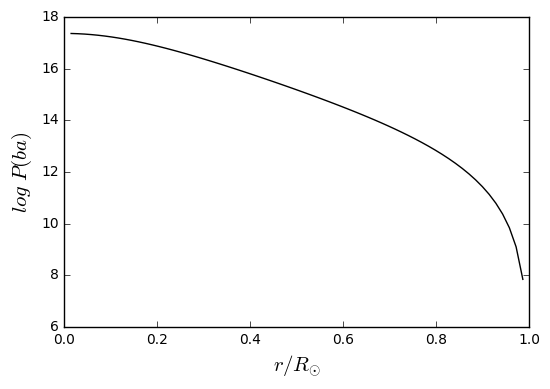

d:\python34\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


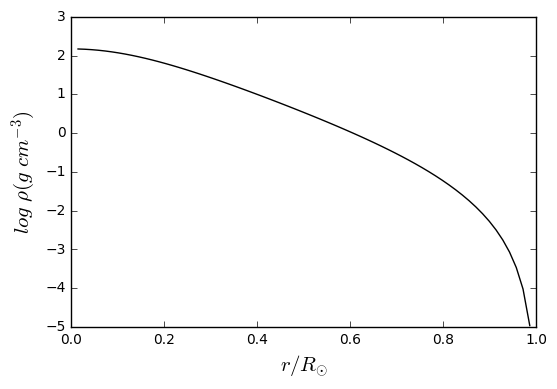

In [6]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

data = ascii.read('polytrope_n3.txt')

z_n = 6.89685
P_c = 2.31152721018e+17
rho_c = 1.50e+02
alpha = 1/z_n
K = P_c/(rho_c**(4/3))

z = data['Xi']
w = data['Theta']

r_poly = alpha*z
rho_poly = rho_c*w**3
P_poly = K*rho_poly**(4/3)

plt.plot(r_poly,np.log10(P_poly),'k')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$log\ P(ba)$',fontsize=15)
plt.show()
plt.plot(r_poly,np.log10(rho_poly),'k')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$log\ \\rho(g\ cm^{-3})$',fontsize=15)
plt.show()

In [23]:
print(P_tol[:10])

        X        
-----------------
2.31152721018e+17
2.31152721018e+17
2.31152721018e+17
2.31152721018e+17
2.31152721018e+17
2.31152721018e+17
2.31152721018e+17
2.31152721018e+17
2.31152721018e+17
2.31152721018e+17


## (f)

from below plots, the polytropic model looks roughly coincident with standard model, not only the order of magnitude but also the structure shape.

d:\python34\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


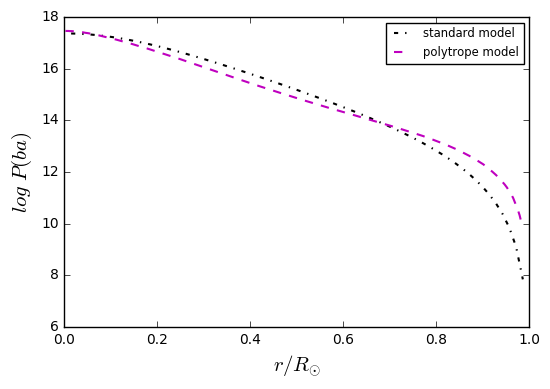

d:\python34\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


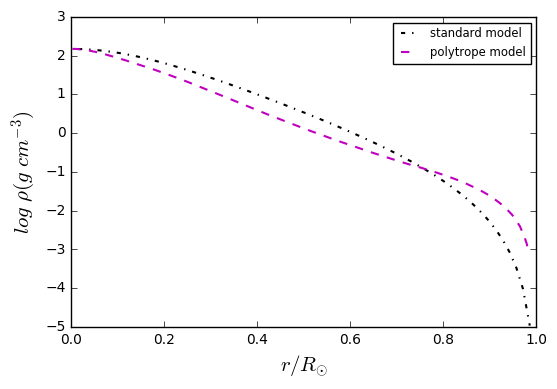

In [29]:
m_u = 1.6605388*10**-24     # g
k = 1.380650*10**-16        # erg K−1
a = 7.56578*10**-15         # erg cm−3 K−4.

X_e = 7.58e-01
Y_e = 2.29e-01
n_H_e = X_e*rho/m_u
n_He_e = Y_e*rho/(4*m_u)
n_e_e = n_H_e+2*n_He_e

P_ion_e = (n_H_e+n_He_e)*k*T
P_e_e = n_e*k*T
P_rad_e = (a*T**4)/3
P_tol_e = P_ion_e+P_e_e+P_rad_e

plt.plot(r_poly,np.log10(P_poly),'k-.',linewidth=1.5,label='standard model')
plt.plot(r,np.log10(P_tol_e),'m--',linewidth=1.5,label='polytrope model')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$log\ P(ba)$',fontsize=15)
plt.legend(fontsize='small')
plt.show()
plt.plot(r_poly,np.log10(rho_poly),'k-.',linewidth=1.5,label='standard model')
plt.plot(r,np.log10(rho),'m--',linewidth=1.5,label='polytrope model')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$log\ \\rho(g\ cm^{-3})$',fontsize=15)
plt.legend(fontsize='small')
plt.show()

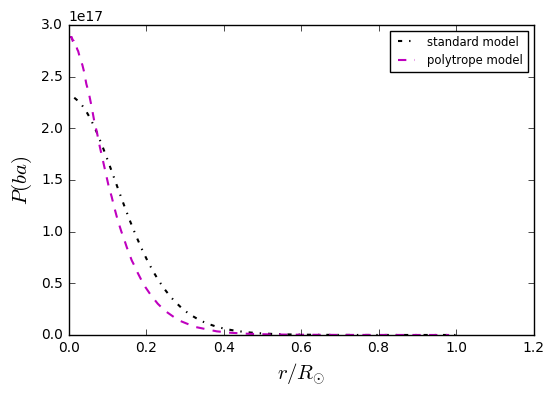

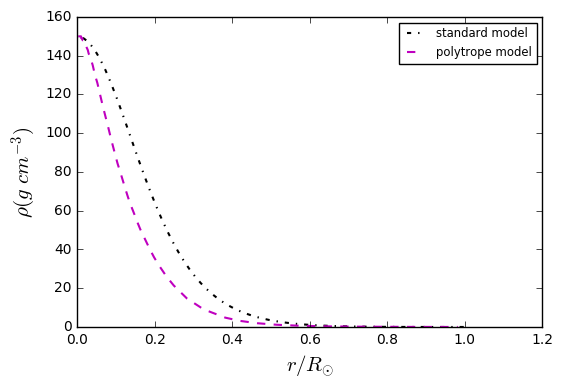

In [31]:
plt.plot(r_poly,P_poly,'k-.',linewidth=1.5,label='standard model')
plt.plot(r,P_tol_e,'m--',linewidth=1.5,label='polytrope model')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$P(ba)$',fontsize=15)
plt.legend(fontsize='small')
plt.show()
plt.plot(r_poly,rho_poly,'k-.',linewidth=1.5,label='standard model')
plt.plot(r,rho,'m--',linewidth=1.5,label='polytrope model')
plt.xlabel('$r/R_{\\odot}$',fontsize=15)
plt.ylabel('$\\rho(g\ cm^{-3})$',fontsize=15)
plt.legend(fontsize='small')
plt.show()

# 2. Opacities

## (a)

for $\kappa_{es} = 0.2(1 + X) cm^{2}/g\ \propto\ T^{0}$

$\kappa_{ff} \approx 3.8\times10^{22}(1 + X)\rho T^{-7/2} cm^{2}/g\ \propto\ \rho T^{-7/2}$

$\kappa_{bf} \approx 4.3\times10^{25}(1 + X)Z\rho T^{-7/2} cm^{2}/g\ \approx\ 10^{3}Z\times \kappa_{ff} \propto\ \rho T^{-7/2}$

$\kappa_{H^{-}} \approx 2.5\times10^{-31}\frac{Z}{0.02}\rho^{1/2} T^{9} cm^{2}/g\ \propto\ \rho^{1/2} T^{9}$

according to the equations above

for $\rho$ within $10^{-10}\sim10^{-8}\ g\ cm^{-3}$, electron scattering is important when $T < 10^{3}K\ or\ T > 10^{5}K$.

when temperature within $10^{3.5}K\sim10^{4}K$, the negative hydrogen ion is important, 

in other temperature range, the bound-free and bound-bound absorption dominant.

for $\rho \sim 10^{-6}\ g\ cm^{-3}$, electron scattering is important when $T > 10^{6}K$. 

when temperature within $10^{3.5}K\sim10^{4.2}K$, the negative hydrogen ion is important, 

and when temperature within $10^{4.2}K\sim10^{6}K$, the bound-free and bound-bound absorption dominant.

for $\rho$ within $10^{-4}\sim 1\ g\ cm^{-3}$, electron scattering is important when $T > 10^{6.5}K$, 

and when temperature within $10^{4.5}K\sim10^{6.5}K$, the bound-free and bound-bound absorption dominant.

## (b)

as the relation function shown in (a)

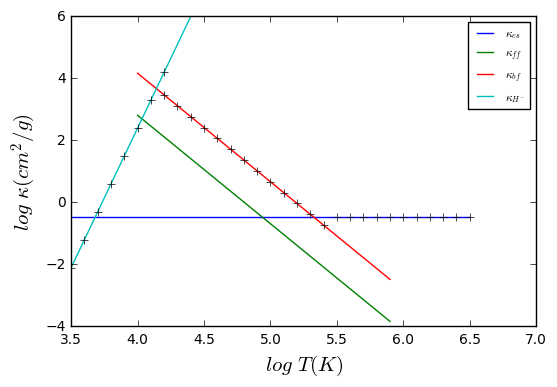

In [53]:
import numpy as np
import matplotlib.pyplot as plt

X = 0.7
Z = 0.02
rho = 10**-6

logT = np.arange(3.5,6.6,0.1)
ka_es = 0.2*(1 + X)*logT**0
ka_ff = 3.8*10**22*(1+X)*rho*10**(-7*logT/2)
ka_bf = 4.3*10**25*(1+X)*Z*rho*10**(-7*logT/2)
ka_H_ = 2.5*10**-31*(Z/0.02)*rho**0.5*10**(9*logT)

plt.plot(logT,np.log10(ka_es),label='$\\kappa_{es}$')
plt.plot(logT[5:25],np.log10(ka_ff)[5:25],label='$\\kappa_{ff}$')
plt.plot(logT[5:25],np.log10(ka_bf)[5:25],label='$\\kappa_{bf}$')
plt.plot(logT[:10],np.log10(ka_H_)[:10],label='$\\kappa_{H^{-}}$')
plt.plot(logT[20:],np.log10(ka_es)[20:],'k+')
#plt.plot(logT[8:22],np.log10(ka_ff)[8:22])
plt.plot(logT[7:20],np.log10(ka_bf)[7:20],'k+')
plt.plot(logT[:8],np.log10(ka_H_)[:8],'k+')
plt.xlabel('$log\ T(K)$',fontsize=15)
plt.ylabel('$log\ \\kappa(cm^{2}/g)$',fontsize=15)
plt.legend(fontsize='small')
plt.show()

emmmm, looks approximate fairly well.

## (c)

from the right panel of Fig. 5.2, when temperature is $10^{7}K,\ 10^{5}K\ and\ 10^{4}K$

the density relevant is $\ 10^{1.7}\ gcm^{-3},\ 10^{-2.5}\ gcm^{-3}\ and\ 10^{-6.5}\ gcm^{-3}$

with the result in (a)

when $T = 10^{7}K$

$\kappa \approx \kappa_{es} \approx 3.5\ cm^{2}/g$

$l_{ph} = \frac{1}{\kappa\rho} \sim 175cm$

when $T = 10^{5}K$

$\kappa \approx \kappa_{bf} \approx 1.5\times10^{4}\ cm^{2}/g$

$l_{ph} = \frac{1}{\kappa\rho} \sim 0.02cm$

when $T = 10^{4}K$

$\kappa \approx \kappa_{H^{-}} \approx 140\ cm^{2}/g$

$l_{ph} = \frac{1}{\kappa\rho} \sim 2.3\times10^{4}cm$

## (d)

for $U_{\nu} = \frac{8\pi h}{c^{3}}\frac{\nu^{3}}{e^{h\nu/kT}-1}$

and $\frac{1}{\kappa} = \frac{1}{4\pi aT^{3}}\int^{\infty}_{0}\frac{1}{\kappa_{\nu}}\frac{\partial U_{\nu}}{\partial T}d\nu$

if $\kappa_{\nu} = \kappa_{0}\nu^{-\alpha}$

thus $\frac{1}{\kappa} = \frac{1}{4\pi aT^{3}\kappa_{0}}\int^{\infty}_{0}\nu^{\alpha}\frac{\partial U_{\nu}}{\partial T}d\nu$

$\qquad = \frac{h}{4\pi aT^{3}k\kappa_{0}}\int^{\infty}_{0}\nu^{\alpha+4}\frac{e^{h\nu/kT}}{(e^{h\nu/kT}-1)^{2}T^{2}}d\nu$

we can write x as $h\nu/kT$

then we have $\frac{1}{\kappa} = \frac{h}{4\pi aT^{3}k\kappa_{0}}\int^{\infty}_{0}(kT/h)^{\alpha+5}x^{\alpha+4}\frac{e^{x}}{(e^{x}-1)^{2}T^{2}}dx$

$\qquad\qquad\ \ = bT^{\alpha}\int^{\infty}_{0}x^{\alpha+4}\frac{e^{x}}{(e^{x}-1)^{2}}dx \propto T^{\alpha} \qquad where\ b = \frac{k^{\alpha+4}}{4\pi a\kappa_{0}h^{\alpha+4}}$

thus $\kappa \propto T^{-\alpha}$

# 3. Convection I

As shown in above figure, for the displacement and expansion of the gas bubble is nearly adiabatic,

mark the changes in the density and pressure of the bubble when it is displaced over a small distance $\Delta r$ as $\delta\rho_{e}$ and $\delta P_{e}$ 

Then we can get

$\frac{\delta P_{e}}{P_{e}} = \gamma_{ad}\frac{\delta\rho_{e}}{\rho_{e}}\qquad$ where $\gamma_{ad}$ is the adiabatic exponent.

here for $P_{e} = P_{2}$

thus $\delta P_{e} = P_{2}-P_{1} = \frac{dP}{dr}\Delta r$

$\delta\rho_{e} = \frac{\rho_{e}}{P_{e}}\frac{1}{\gamma_{ad}}\frac{dP}{dr}\Delta r$

with $\rho_{e} = \rho_{1}+\delta\rho_{e}\qquad \rho_{2} = \rho_{1}+\frac{d\rho}{dr}\Delta r$

and the condition for convective instability is $\rho_{e} < \rho_{2}$

namely $\frac{1}{\rho}\frac{d\rho}{dr} > \frac{1}{P}\frac{dP}{dr}\frac{1}{\gamma_{ad}}$

here we have replaced $P_{e}$ and $\rho_{e}$ by P and $\rho$ since the perturbations are assumed to be very small.

with the first law of thermodynamics  $du = Tds + P\frac{d\rho}{\rho^{2}}$

we can write above inequation as $T\frac{ds}{dr} < \frac{du}{dr} - \frac{1}{\rho}\frac{dP}{dr}\frac{1}{\gamma_{ad}}$ by sbustitute $d\rho$

for ideal gas

$u = \frac{U}{\rho} = \frac{3}{2}\frac{P}{\rho}$

$\frac{du}{dr} = \frac{3}{2}(\frac{1}{\rho}\frac{dP}{dr} - \frac{P}{\rho}\frac{1}{\rho}\frac{d\rho}{dr})$

then we can get

$T\frac{ds}{dr} < (\frac{3}{2}-\frac{1}{\gamma_{ad}})\frac{1}{\rho}\frac{dP}{dr} - \frac{3}{2}\frac{P}{\rho}\frac{1}{\rho}\frac{d\rho}{dr}$

$\ \ \ \ \ \  < (\frac{3}{2}-\frac{1}{\gamma_{ad}})\frac{1}{\rho}\frac{dP}{dr} - \frac{3}{2}\frac{P}{\rho}\frac{1}{P}\frac{dP}{dr}\frac{1}{\gamma_{ad}} = (\frac{3}{2}-\frac{5}{2}\frac{1}{\gamma_{ad}})\frac{1}{\rho}\frac{dP}{dr}$

for $\gamma_{ad}$ within $\frac{4}{3} \sim \frac{5}{3}$

and when $gamma_{ad} = \frac{5}{3}$, $T\frac{ds}{dr} < 0$

so when $dr < 0$

we can get $ds > 0$

which means high entropy material beneath low entropy material is convectively unstable.

# 4. Convection II

given $r\sim R_{\odot}/2 = 3.5\times10^{10}cm$

$m(r)\sim M_{\odot}/2 = 1.0\times10^{33}g$

$T\sim10^{7}K \qquad \rho \sim 1g/cm^{3}$

$F_{c}\sim \frac{L_{\odot}}{4\pi r^{2}} =2.47\times10^{11}ergcm^{-2}s^{-1}$

$l_{c}\sim\ r/10 = 3.5\times10^{9}cm$

$g = Gm(r)/r^{2} = 5.5\times10^{4}cm/s^{2}$

## (a)

for $\Delta u = C_{P}\Delta T$

$F_{c} = v_{c}\rho\Delta u $

$v_{c} = \sqrt{\frac{1}{2}l_{c}g\frac{\Delta T}{T}}$

$C_{P} = \frac{5}{2}\frac{k}{\mu m_{H}}$

$\frac{1}{\mu} = 0.73 + 0.25/4 + 0.73 +2\times0.25/4 = 1.65$

thus $\frac{F_{c}}{T} = \sqrt{\frac{1}{2}l_{c}g}\rho \frac{5}{2}\frac{k}{\mu m_{H}}(\frac{\Delta T}{T})^{3/2}$


=> $\frac{\Delta T}{T} \approx 3.8\times10^{-8} $

## (b)

with $\frac{\Delta T}{T}$ from (a)

$v_{c} = \sqrt{\frac{1}{2}l_{c}g\frac{\Delta T}{T}} = 1.90\times10^{3}cm/s$

and $c_{s} = \sqrt{\frac{kT}{\mu m_{H}}} = 3.69\times10^{7}cm/s$

so the $v_{c}$ is quiet small compare to $c_{s}$

## (c)

with $P_{turb} = \rho v_{c}^{2}$ and $P_{loc} = nkT =\frac{\rho}{\mu m_{H}}kT$

=> $P_{turb} = 3.60\times10^{6}ba$

$P_{loc} = 1.36\times10^{15}ba$

thus $\frac{P_{turb}}{P_{loc}} = 2.65\times10^{-9}$ is really small.

## (d)

for $t\sim l_{c}/v_{c}$

=> $t \sim 1.8\times10^{6}s \approx 0.06yr$

and $t_{therm}\sim 1.5\times 10^{7}yr \qquad t_{nuc}\sim 10^{10}yr$

so there is sufficient time to let stellar material mix up within convective regions,

and then have a uniform chemical composition within the regions.

# 5. Order-of-magnitude question

To get how much energy China use per day, take me for example. The electric appliances which I use everyday

are my laptop and mobile phone， their total power is less then 100W/h, just regard it as 100W/h. And the work

time is 15h, then the electric energy I consumed everyday is roughly 1.5kW， nearly $5\times10^{6}J$. For people 

may have a car or anything like that, it will consume some fossil energy. Take the fossil energy that consumed 

everyday as $5\times10^{6}J$ too, then the total energy one consumed everyday is roughly $10^{7}J$. That $10^{7}J/d$ is

for people like us, there are also many people work in factory or enterprise where the energy consumed everyday

 per person is much more than us, take it ten times more than us and consider that people in factory or enterprise 
 
 account for 1/3 of all chinese which nearly 500 million. Then the energy China use per day comes to $10^{9}\times10^{7}J$
 
 $+ 5\times10^{8}\times10^{8}J \sim 6\times10^{16}J$

To get how large of area would China require to obtain all energy needed through solar power, we know that the 

solar constant is roughly $1370W/m^{2}$, and the conversion efficiency of solar energy material today is generally

$\sim 15%$. So to obtain solar energy of $6\times10^{16}J$, considering the solar energy materialcan work 10h efficiently per

day, we need an area $\sim\frac{6\times10^{16}}{1370\times10\times3600\times15%} = 8\times10^{9}m^{2} = 8\times10^{3}km^{2}$

For China has a area nearly $14\ billion\ km^{2}$ including the territorial sea, so to obtain all energy needed through

solar power looks feasible.